Metropolis Criteria = 1.0, Iteration = 37, Best so far = [-0.95340594], New best = 0.90898
Metropolis Criteria = 1.0, Iteration = 39, Best so far = [-0.91563305], New best = 0.83838
Metropolis Criteria = 1.0, Iteration = 40, Best so far = [-0.85680363], New best = 0.73411
Metropolis Criteria = 1.0, Iteration = 41, Best so far = [-0.8221177], New best = 0.67588
Metropolis Criteria = 1.0, Iteration = 42, Best so far = [-0.68541443], New best = 0.46979
Metropolis Criteria = 1.0, Iteration = 43, Best so far = [-0.61804282], New best = 0.38198
Metropolis Criteria = 1.0, Iteration = 50, Best so far = [-0.42564785], New best = 0.18118
Metropolis Criteria = 1.0, Iteration = 66, Best so far = [-0.35632231], New best = 0.12697
Metropolis Criteria = 1.0, Iteration = 67, Best so far = [-0.33780667], New best = 0.11411
Metropolis Criteria = 1.0, Iteration = 72, Best so far = [-0.3368772], New best = 0.11349
Metropolis Criteria = 1.0, Iteration = 75, Best so far = [-0.29671621], New best = 0.08804
M

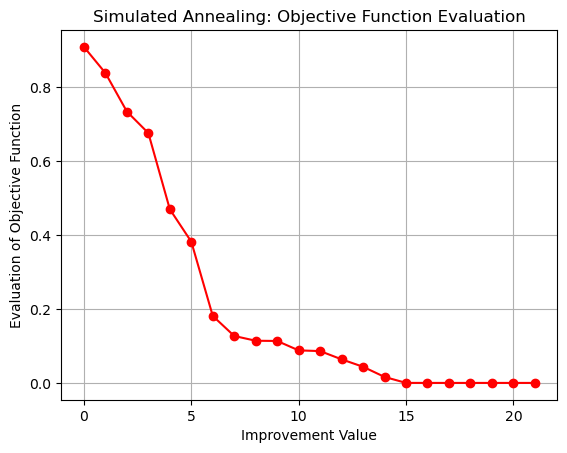

In [2]:
import numpy as np
from numpy import asarray, exp
from numpy.random import randn, rand, seed
from matplotlib import pyplot

# Define objective function (y = x^2)
def objective(step):
    return step[0] ** 2.0

# Define the Simulated Annealing algorithm
def sa(objective, area, iterations, step_size, temperature):
    # Generate a random start point within the search space
    start_point = area[:, 0] + rand(len(area)) * (area[:, 1] - area[:, 0])
    # Evaluate the start point
    start_point_eval = objective(start_point)
    
    # Assign the best starting point and its evaluation to variables
    mia_start_point, mia_start_eval = start_point, start_point_eval
    outputs = []  # This will store the best evaluations

    for i in range(iterations):
        # Generate a step in the search
        mia_step = mia_start_point + randn(len(area)) * step_size
        mia_step_eval = objective(mia_step)

        # If the step improves the solution, adopt it
        if mia_step_eval < start_point_eval:
            start_point, start_point_eval = mia_step, mia_step_eval
            outputs.append(start_point_eval)
            print(f'Metropolis Criteria = {1.0}, Iteration = {i}, Best so far = {start_point}, New best = {start_point_eval:.5f}')

        # Else, calculate the acceptance probability
        difference = mia_step_eval - mia_start_eval
        t = temperature / float(i + 1)
        metropolis = exp(-difference / t)

        # Decide to keep the new point based on Metropolis Criterion
        if difference < 0 or rand() < metropolis:
            mia_start_point, mia_start_eval = mia_step, mia_step_eval

    return [start_point, start_point_eval, outputs]

# Seed for reproducibility
seed(1)

# Define the area of the search space (search space bounds)
area = asarray([[-6.0, 6.0]])

# Define parameters for the Simulated Annealing
temperature = 12
iterations = 1200
step_size = 0.1

# Perform the Simulated Annealing search
start_point, output, outputs = sa(objective, area, iterations, step_size, temperature)

# Plotting the results
pyplot.plot(outputs, 'ro-')
pyplot.xlabel('Improvement Value')
pyplot.ylabel('Evaluation of Objective Function')
pyplot.title('Simulated Annealing: Objective Function Evaluation')
pyplot.grid(True)
pyplot.show()